<a href="https://www.kaggle.com/code/coderpulkits/comparison-of-rnn-lstm-embeddings?scriptVersionId=199880636" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentimental-analysis-for-tweets/sentiment_tweets3.csv


**Processing the Data**

In [2]:
df = pd.read_csv("/kaggle/input/sentimental-analysis-for-tweets/sentiment_tweets3.csv")
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [3]:
df.shape

(10314, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [5]:
df.drop('Index', axis=1, inplace=True)
df.head()

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import LSTM, Dense, SimpleRNN, Embedding, Flatten, Dropout

In [7]:
# test data
y = df['label (depression result)']
test_size = len(y)

y

0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: label (depression result), Length: 10314, dtype: int64

**Converting the Textual Data in Numeric Data**

In [8]:
tokenizer = Tokenizer(oov_token="<nothing>")

token = tokenizer.fit_on_texts(df['message to examine'])

token

In [9]:
tokenizer.document_count

10314

In [10]:
# this denotes a map where index of every word is given 
len(tokenizer.word_index)

23196

In [11]:
# this is the unique number of words present in the data
vocab = len(tokenizer.word_index)
vocab

23196

In [12]:
sequences = tokenizer.texts_to_sequences(df['message to examine'])

sequences_padded = pad_sequences(sequences, padding = "post")
sequences_padded

array([[  22,   91,    5, ...,    0,    0,    0],
       [  11,  547, 7068, ...,    0,    0,    0],
       [3570,   27,  176, ...,    0,    0,    0],
       ...,
       [2493, 4496, 2321, ...,    0,    0,    0],
       [ 316, 1804,    5, ...,    0,    0,    0],
       [ 659,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [13]:
sequences_padded.shape

(10314, 102)

In [14]:
timestamp = len(sequences_padded[0])
timestamp

102

In [15]:
# to find the last word index of the longest tweet
def lastWordIndexes(arr):
    n = len(arr[0])
    size = len(arr)
    lastWords = []
    for i in range(size):
        if(arr[i][n-1]!=0):
            lastWords.append(i)
    return lastWords

In [16]:
# this indicates the row no of the tweets which have the longest length
# here we only have one tweet which is the longest
lastWords = lastWordIndexes(sequences_padded)
lastWords

[9410]

In [17]:
# test train data split

X_train, X_test, y_train, y_test = train_test_split(sequences_padded,y,test_size = 0.2, random_state = 42)

**This is the RNN Model**

In [18]:
# RNN model without embedding

modelRNN = Sequential()

# 32*1 weights + 32*32 hidden weights + 32 bias = 1088
modelRNN.add(SimpleRNN(64, input_shape = (timestamp, 1), activation="tanh"))
# 1*32 weights + 1 bias = 33
modelRNN.add(Dense(1, activation="sigmoid"))

modelRNN.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# model compile
modelRNN.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

historyRNN = modelRNN.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7926 - loss: 0.5006 - val_accuracy: 0.8526 - val_loss: 0.4120
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8310 - loss: 0.4406 - val_accuracy: 0.8526 - val_loss: 0.4030
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8493 - loss: 0.4047 - val_accuracy: 0.8056 - val_loss: 0.5062
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7813 - loss: 0.5224 - val_accuracy: 0.7824 - val_loss: 0.5242
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7693 - loss: 0.5420 - val_accuracy: 0.7824 - val_loss: 0.5246
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7669 - loss: 0.5449 - val_accuracy: 0.7824 - val_loss: 0.5191
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7825 - loss: 0.5205 - val_accuracy: 0.7824 - val_loss: 0.5291
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7678 - loss: 0.5403 - val_accu

**RNN with Embeddings**

In [20]:
modelRNNEmb = Sequential()

# output dim = 3 embeddings per word
modelRNNEmb.add(Embedding(vocab+1, 3, input_shape = (timestamp,)))
modelRNNEmb.add(SimpleRNN(64, activation="tanh"))
modelRNNEmb.add(Dense(1, activation = "sigmoid"))

modelRNNEmb.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 102, 3)         │        69,591 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,008 (289.09 KB)

 Trainable params: 74,008 (289.09 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
modelRNNEmb.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

historyRNNEmb = modelRNNEmb.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7717 - loss: 0.5432 - val_accuracy: 0.7824 - val_loss: 0.5271
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7763 - loss: 0.5346 - val_accuracy: 0.7824 - val_loss: 0.5284
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7796 - loss: 0.5299 - val_accuracy: 0.7824 - val_loss: 0.5357
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7718 - loss: 0.5405 - val_accuracy: 0.7824 - val_loss: 0.5267
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.7600 - loss: 0.5509 - val_accuracy: 0.7824 - val_loss: 0.5263
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7789 - loss: 0.5319 - val_accuracy: 0.7824 - val_loss: 0.5266
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7700 - loss: 0.5412 - val_accuracy: 0.7824 - val_loss: 0.5252
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7817 - loss: 0.5268 - val_acc

**This is the LSTM Model**

In [22]:
modelLSTM = Sequential()

modelLSTM.add(LSTM(64, activation = "tanh", input_shape = (timestamp,1)))
modelLSTM.add(Dense(1, activation = "sigmoid"))

modelLSTM.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
modelLSTM.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

historyLSTM = modelLSTM.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8059 - loss: 0.5057 - val_accuracy: 0.8056 - val_loss: 0.4293
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8365 - loss: 0.4093 - val_accuracy: 0.8366 - val_loss: 0.4120
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8371 - loss: 0.4053 - val_accuracy: 0.8492 - val_loss: 0.3550
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8411 - loss: 0.3667 - val_accuracy: 0.8541 - val_loss: 0.3328
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8488 - loss: 0.3823 - val_accuracy: 0.8551 - val_loss: 0.3543
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8540 - loss: 0.3403 - val_accuracy: 0.8652 - val_loss: 0.3256
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8705 - loss: 0.3211 - val_accuracy: 0.8827 - val_loss: 0.3074
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8640 - loss: 0.3257 - 

**LSTM with Embeddings**

In [24]:
modelLSTMEmb = Sequential()

# output dim = 3 embeddings per word
modelLSTMEmb.add(Embedding(vocab+1, 3, input_shape = (timestamp,)))
modelLSTMEmb.add(LSTM(64, activation="tanh"))
modelLSTMEmb.add(Dense(1, activation = "sigmoid"))

modelRNNEmb.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 102, 3)         │        69,591 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,026 (867.29 KB)

 Trainable params: 74,008 (289.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 148,018 (578.20 KB)

In [25]:
modelLSTMEmb.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

historyLSTMEmb = modelLSTMEmb.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.7619 - loss: 0.5658 - val_accuracy: 0.7824 - val_loss: 0.5240
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.7680 - loss: 0.5430 - val_accuracy: 0.7824 - val_loss: 0.5240
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7716 - loss: 0.5385 - val_accuracy: 0.7824 - val_loss: 0.5254
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.7742 - loss: 0.5354 - val_accuracy: 0.7824 - val_loss: 0.5240
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.7739 - loss: 0.5354 - val_accuracy: 0.7824 - val_loss: 0.5243
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.7788 - loss: 0.5306 - val_accuracy: 0.7824 - val_loss: 0.5268
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.7760 - loss: 0.5333 - val_accuracy: 0.6549 - val_loss: 0.7119
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.7724 - loss: 0.5081 - 

In [26]:
# contains 4 metrics
# accuracy, loss
# validation accuracy, validation loss

historyLSTMEmb.history

{'accuracy': [0.7720276117324829,
  0.7739667892456055,
  0.7739667892456055,
  0.7739667892456055,
  0.7739667892456055,
  0.7739667892456055,
  0.7749363780021667,
  0.7714216709136963,
  0.7739667892456055,
  0.7739667892456055],
 'loss': [0.5438999533653259,
  0.5357356071472168,
  0.5353180170059204,
  0.5355754494667053,
  0.5354443192481995,
  0.5358800888061523,
  0.5344176888465881,
  0.5065208673477173,
  0.5383582711219788,
  0.5358380675315857],
 'val_accuracy': [0.782355785369873,
  0.782355785369873,
  0.782355785369873,
  0.782355785369873,
  0.782355785369873,
  0.782355785369873,
  0.6548715233802795,
  0.782355785369873,
  0.782355785369873,
  0.782355785369873],
 'val_loss': [0.524025559425354,
  0.5239743590354919,
  0.5254009962081909,
  0.5240103006362915,
  0.5243038535118103,
  0.5268311500549316,
  0.7118784189224243,
  0.48835837841033936,
  0.5242372155189514,
  0.5265975594520569]}

**Comparison of Various Models**

In [27]:
import matplotlib.pyplot as plt

**Training Data Accuracy**

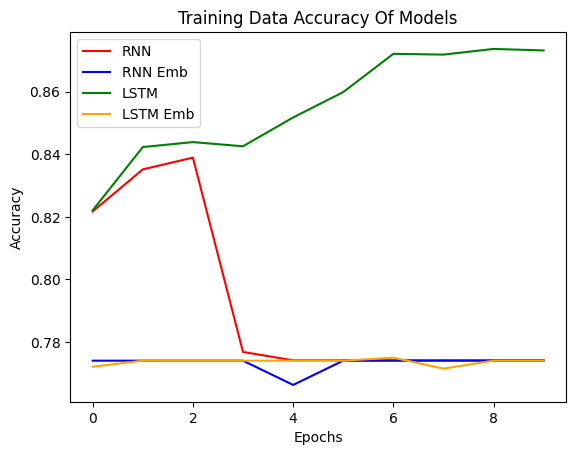

In [28]:
# Training Data Accuracy

plt.title("Training Data Accuracy Of Models")

plt.plot(historyRNN.history['accuracy'], color='red',label='RNN')
plt.plot(historyRNNEmb.history['accuracy'], color='blue',label='RNN Emb')
plt.plot(historyLSTM.history['accuracy'], color='green',label='LSTM')
plt.plot(historyLSTMEmb.history['accuracy'], color='orange',label='LSTM Emb')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()

**Validation Data Accuracy**

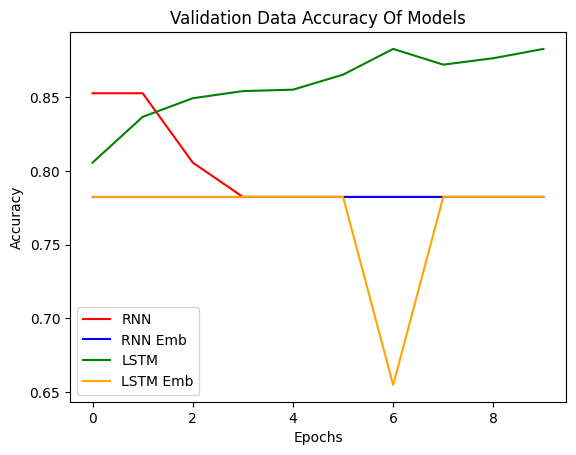

In [29]:
# Validation Data Accuracy

plt.title("Validation Data Accuracy Of Models")

plt.plot(historyRNN.history['val_accuracy'], color='red',label='RNN')
plt.plot(historyRNNEmb.history['val_accuracy'], color='blue',label='RNN Emb')
plt.plot(historyLSTM.history['val_accuracy'], color='green',label='LSTM')
plt.plot(historyLSTMEmb.history['val_accuracy'], color='orange',label='LSTM Emb')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()

**Training Data Loss**

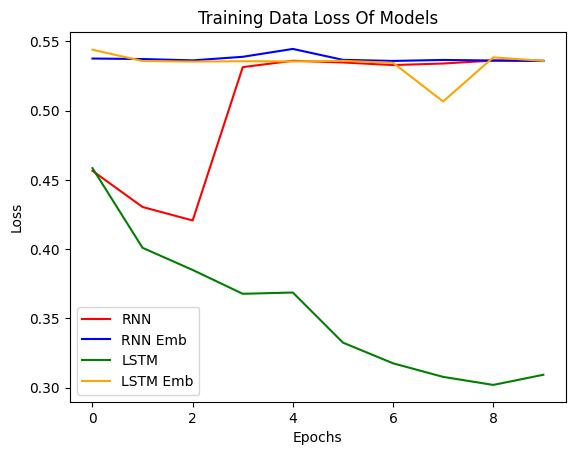

In [30]:
# Traning Data Loss

plt.title("Training Data Loss Of Models")

plt.plot(historyRNN.history['loss'], color='red',label='RNN')
plt.plot(historyRNNEmb.history['loss'], color='blue',label='RNN Emb')
plt.plot(historyLSTM.history['loss'], color='green',label='LSTM')
plt.plot(historyLSTMEmb.history['loss'], color='orange',label='LSTM Emb')

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()

**Validation Data Loss**

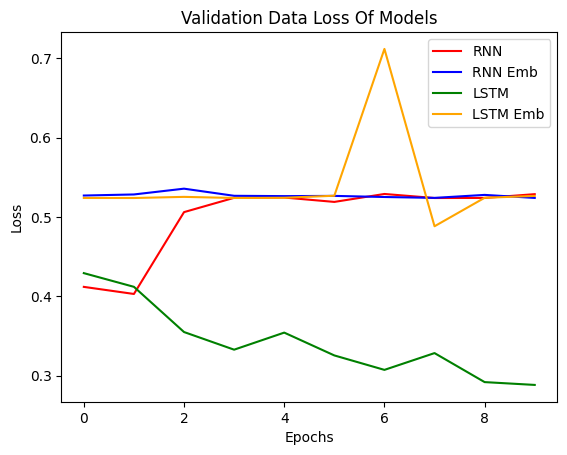

In [31]:
# Validation Data Loss

plt.title("Validation Data Loss Of Models")

plt.plot(historyRNN.history['val_loss'], color='red',label='RNN')
plt.plot(historyRNNEmb.history['val_loss'], color='blue',label='RNN Emb')
plt.plot(historyLSTM.history['val_loss'], color='green',label='LSTM')
plt.plot(historyLSTMEmb.history['val_loss'], color='orange',label='LSTM Emb')

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()

**Predication of the Class**

In [32]:
inputDoc = ["All my friends are toxic",
            "I cant live this sad and hopeless life",
            "Today is my birthday",
            "My parents support me in my sad days",
            "I got a new job with greater salary Yayy"
        ]

# we will use same tokenizer

inputSeq = tokenizer.texts_to_sequences(inputDoc)
inputSeqPad = pad_sequences(inputSeq, padding = "post")

inputSeqPad

array([[   39,     9,   173,    29,  3484,     0,     0,     0,     0],
       [    2,   338,   272,    30,   408,     6, 18202,   106,     0],
       [   61,    11,     9,   273,     0,     0,     0,     0,     0],
       [    9,   758,   401,    18,    14,     9,   408,   192,     0],
       [    2,    73,     5,    77,   293,    15,  2856, 12521,  2762]],
      dtype=int32)

In [33]:
# getting class from sigmoid output
def sigmoidToClass(sig):
    if sig>=0.5:
        return 1
    return 0

In [34]:
inputSize = len(inputSeqPad)

LSTMPred = modelLSTM.predict(inputSeqPad, verbose = 0)
LSTMEmbPred = modelLSTMEmb.predict(inputSeqPad, verbose = 0)
RNNPred = modelRNN.predict(inputSeqPad, verbose = 0)
RNNEmbPred = modelRNNEmb.predict(inputSeqPad, verbose = 0)

for i in range(inputSize):
    LSTMClass = sigmoidToClass(LSTMPred[i])
    LSTMEmbClass = sigmoidToClass(LSTMEmbPred[i])
    RNNClass = sigmoidToClass(RNNPred[i])
    RNNEmbClass = sigmoidToClass(RNNEmbPred[i])
    
    print("Tweet", i+1)
    print("LSTM", LSTMClass)
    print("LSTM Emb", LSTMEmbClass)
    print("RNN", RNNClass)
    print("RNN Emb", RNNEmbClass)
    print("\n")

Tweet 1
LSTM 0
LSTM Emb 0
RNN 0
RNN Emb 0


Tweet 2
LSTM 0
LSTM Emb 0
RNN 0
RNN Emb 0


Tweet 3
LSTM 0
LSTM Emb 0
RNN 0
RNN Emb 0


Tweet 4
LSTM 0
LSTM Emb 0
RNN 0
RNN Emb 0


Tweet 5
LSTM 0
LSTM Emb 0
RNN 1
RNN Emb 0


